In [1]:
import sys
sys.path.append("..")

In [2]:
from libhiaac.temporal.datasets.kuhar import BalancedTimeDomainKuHar
from libhiaac.temporal.transforms.transforms import Composer, FFT1D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
train_dataset = BalancedTimeDomainKuHar(
    dataset_path="../data/datasets/KuHar/Balanced", download=True, mode="train")
val_dataset = BalancedTimeDomainKuHar(
    dataset_path="../data/datasets/KuHar/Balanced", download=True, mode="validation")
test_dataset = BalancedTimeDomainKuHar(
    dataset_path="../data/datasets/KuHar/Balanced", download=True, mode="test")

'../data/datasets/KuHar/Balanced/train.csv' already exists and will not be downloaded again
Done!
'../data/datasets/KuHar/Balanced/val.csv' already exists and will not be downloaded again
Done!
'../data/datasets/KuHar/Balanced/test.csv' already exists and will not be downloaded again
Done!


# Accessing Samples

The dataset is Sizable (works with len() function) and can be iterated by its index 0..len(dataset).
Each sample in the dataset is a dict, with 3 elements (indexed by the name)
- "accelerometer", which contains accelerometer TemporalSample
- "gyroscope", which contains gyroscope TemporalSample
- "meta", which contains information about the samples

TemporalSample is a class that have 3 principal attributes:
- (points) A sequence of M N-dimensional points, represented as a numpy array.
- (timestamp) A 1-D sequence with the time (with M points)
- (flatten()) A function that flatten the N-dimensional array to a 1D array

In [4]:
print(len(train_dataset))

2412


In [5]:
train_dataset[0]

{'accelerometer': Temporal Sample: no. points=300, rate=0.0100 (+-0.0000),
 'gyroscope': Temporal Sample: no. points=300, rate=0.0100 (+-0.0000),
 'meta': {'class': 0, 'serial': 1, 'user': 1060}}

In [6]:
train_dataset[2400]

{'accelerometer': Temporal Sample: no. points=300, rate=0.0100 (+-0.0000),
 'gyroscope': Temporal Sample: no. points=300, rate=0.0100 (+-0.0000),
 'meta': {'class': 17, 'serial': 2, 'user': 1086}}

In [7]:
train_dataset[0]["accelerometer"].timestamps.shape

(300,)

In [8]:
train_dataset[0]["accelerometer"].points.shape

(300, 3)

In [9]:
train_dataset[0]["accelerometer"].flatten().shape

(900,)

In [10]:
train_dataset[0]["gyroscope"].timestamps.shape

(300,)

In [11]:
train_dataset[0]["gyroscope"].points.shape

(300, 3)

In [12]:
train_dataset[0]["gyroscope"].flatten().shape

(900,)

In [13]:
kuhar_sample = np.concatenate([train_dataset[0]["accelerometer"].flatten(), train_dataset[0]["gyroscope"].flatten()])
print(kuhar_sample.shape)

(1800,)


In [14]:
def old_school_kuhar(dataset):
    back_to_kuhar = []
    back_to_kuhar_labels = []

    for sample in dataset:
        kuhar_sample = np.concatenate([sample["accelerometer"].flatten(), sample["gyroscope"].flatten()])
        back_to_kuhar.append(kuhar_sample)
        back_to_kuhar_labels.append(sample["meta"]["class"])

    back_to_kuhar = np.stack(back_to_kuhar, axis=0)
    back_to_kuhar_labels = np.array(back_to_kuhar_labels)
    print(back_to_kuhar.shape, back_to_kuhar_labels.shape)
    return back_to_kuhar, back_to_kuhar_labels

back_to_kuhar, back_to_kuhar_labels = old_school_kuhar(train_dataset)

# May wat to stack val and test...

(2412, 1800) (2412,)


In [15]:
from libhiaac.utils import manifold
tsne_manifold = manifold.manifold_fit_transform(back_to_kuhar, "t-sne", n_components=2)

In [16]:
tsne_manifold.shape

(2412, 2)

In [17]:
df = pd.DataFrame(tsne_manifold, columns=["X", "Y"])
df["label"] = back_to_kuhar_labels
df

,X,Y,label
0,-5.197226,-4.116312,0
1,-0.238473,0.314853,0
2,-5.748256,-3.486149,0
3,-2.629350,-3.683072,0
4,-0.334655,-0.944673,0
...,...,...,...
2407,-12.431808,-2.503397,17
2408,5.584739,11.241620,17
2409,0.523582,-10.892421,17
2410,-1.254038,35.305302,17


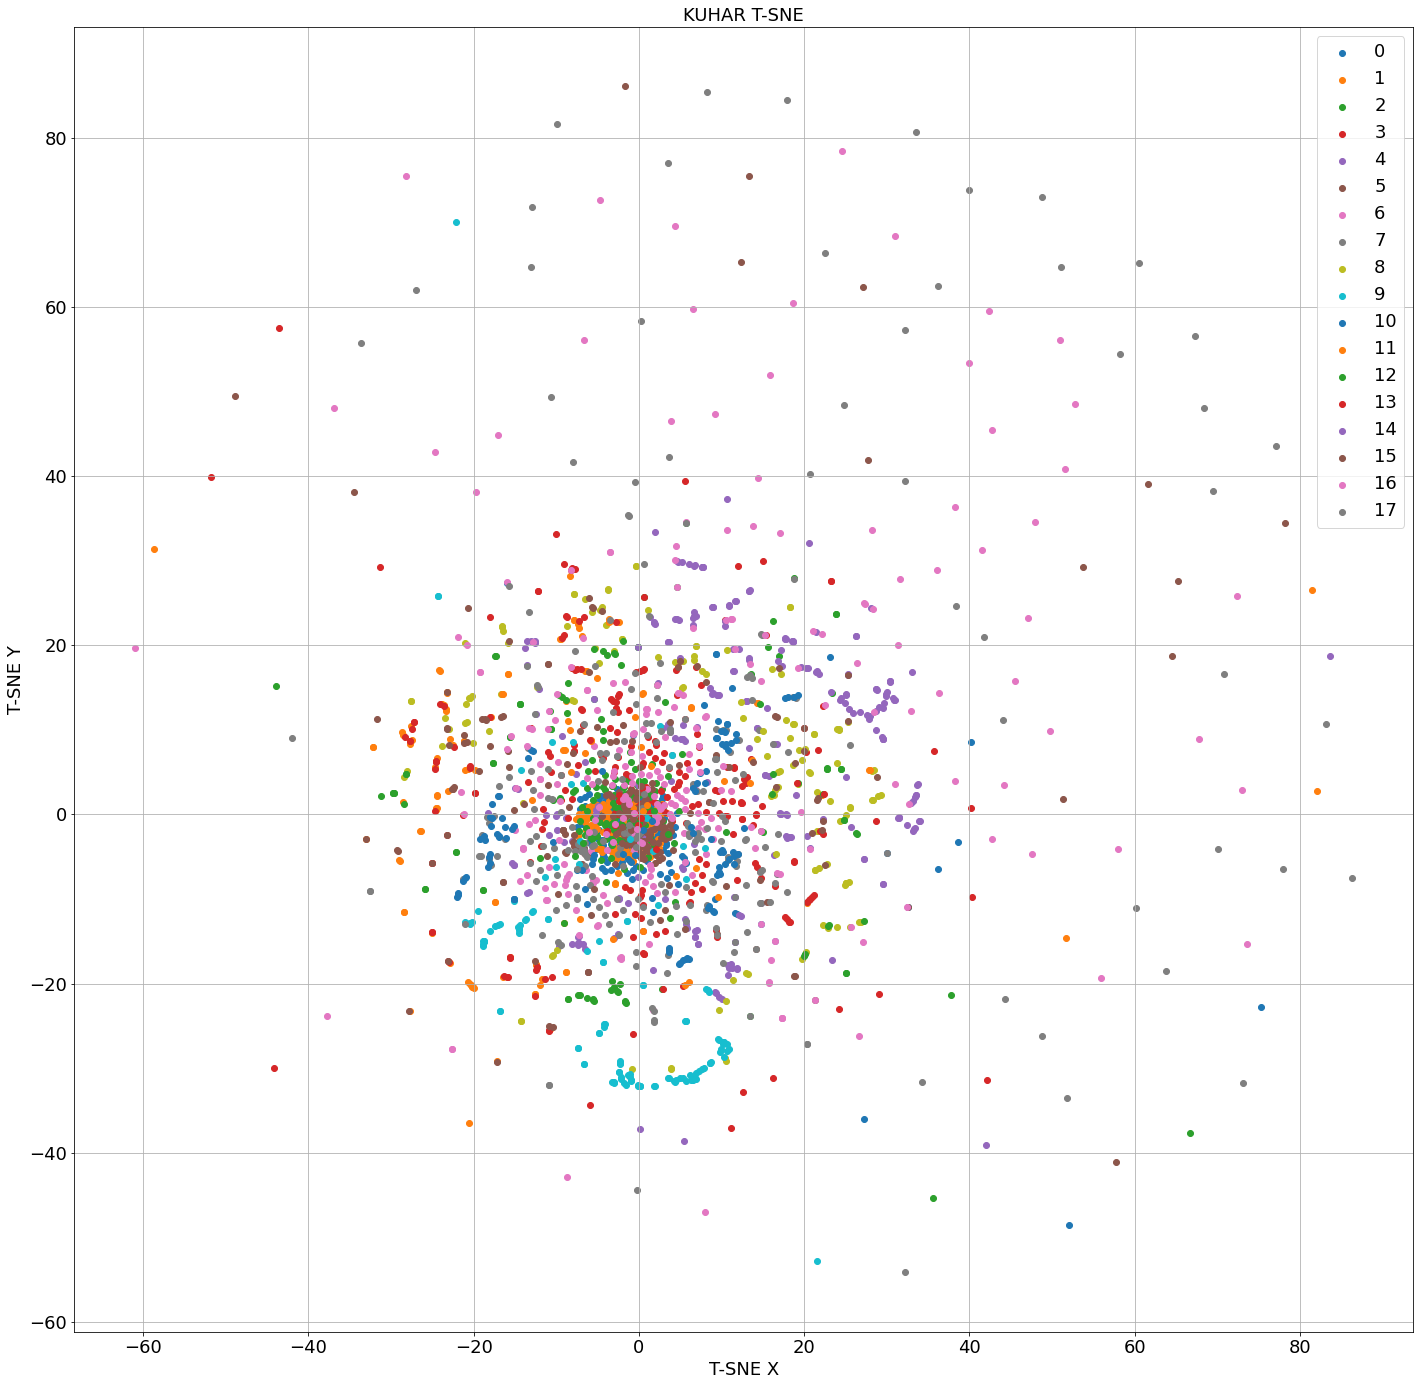

In [18]:
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(1,1,1)
ax.set_title("KUHAR T-SNE", fontsize=18)
ax.set_xlabel("T-SNE X", fontsize=18)
ax.set_ylabel("T-SNE Y", fontsize=18)
    
for label, points in df.groupby("label"):
    ax.scatter(points["X"], points["Y"], label=label)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(prop={'size': 18})
ax.grid()
plt.show()

Applying a transformation to dataset: FFT to each axis of each sample.

You can chain several transformations with the Composer. They will be applyied in order.

Transforms are applyied to each sample in the dataset every time that they are got

In [19]:
transformations = Composer([
    FFT1D()
])

train_dataset = BalancedTimeDomainKuHar(
    dataset_path="../data/datasets/KuHar/Balanced", download=True, mode="train", transforms=transformations)
val_dataset = BalancedTimeDomainKuHar(
    dataset_path="../data/datasets/KuHar/Balanced", download=True, mode="validation", transforms=transformations)
test_dataset = BalancedTimeDomainKuHar(
    dataset_path="../data/datasets/KuHar/Balanced", download=True, mode="test", transforms=transformations)

'../data/datasets/KuHar/Balanced/train.csv' already exists and will not be downloaded again
Done!
'../data/datasets/KuHar/Balanced/val.csv' already exists and will not be downloaded again
Done!
'../data/datasets/KuHar/Balanced/test.csv' already exists and will not be downloaded again
Done!


In [20]:
back_to_kuhar_FFT, back_to_kuhar_labels_FFT = old_school_kuhar(train_dataset)

(2412, 1800) (2412,)


In [21]:
tsne_manifold_FFT = manifold.manifold_fit_transform(back_to_kuhar_FFT, "t-sne", n_components=2)

In [22]:
df = pd.DataFrame(tsne_manifold_FFT, columns=["X", "Y"])
df["label"] = back_to_kuhar_labels_FFT
df

,X,Y,label
0,-28.936184,-42.148933,0
1,-14.084683,-41.589344,0
2,-29.520582,-43.279808,0
3,-11.165703,-43.032799,0
4,-10.346200,-46.884518,0
...,...,...,...
2407,-13.027814,26.325033,17
2408,-15.348157,26.946070,17
2409,-21.832901,25.677330,17
2410,-23.599249,30.952881,17


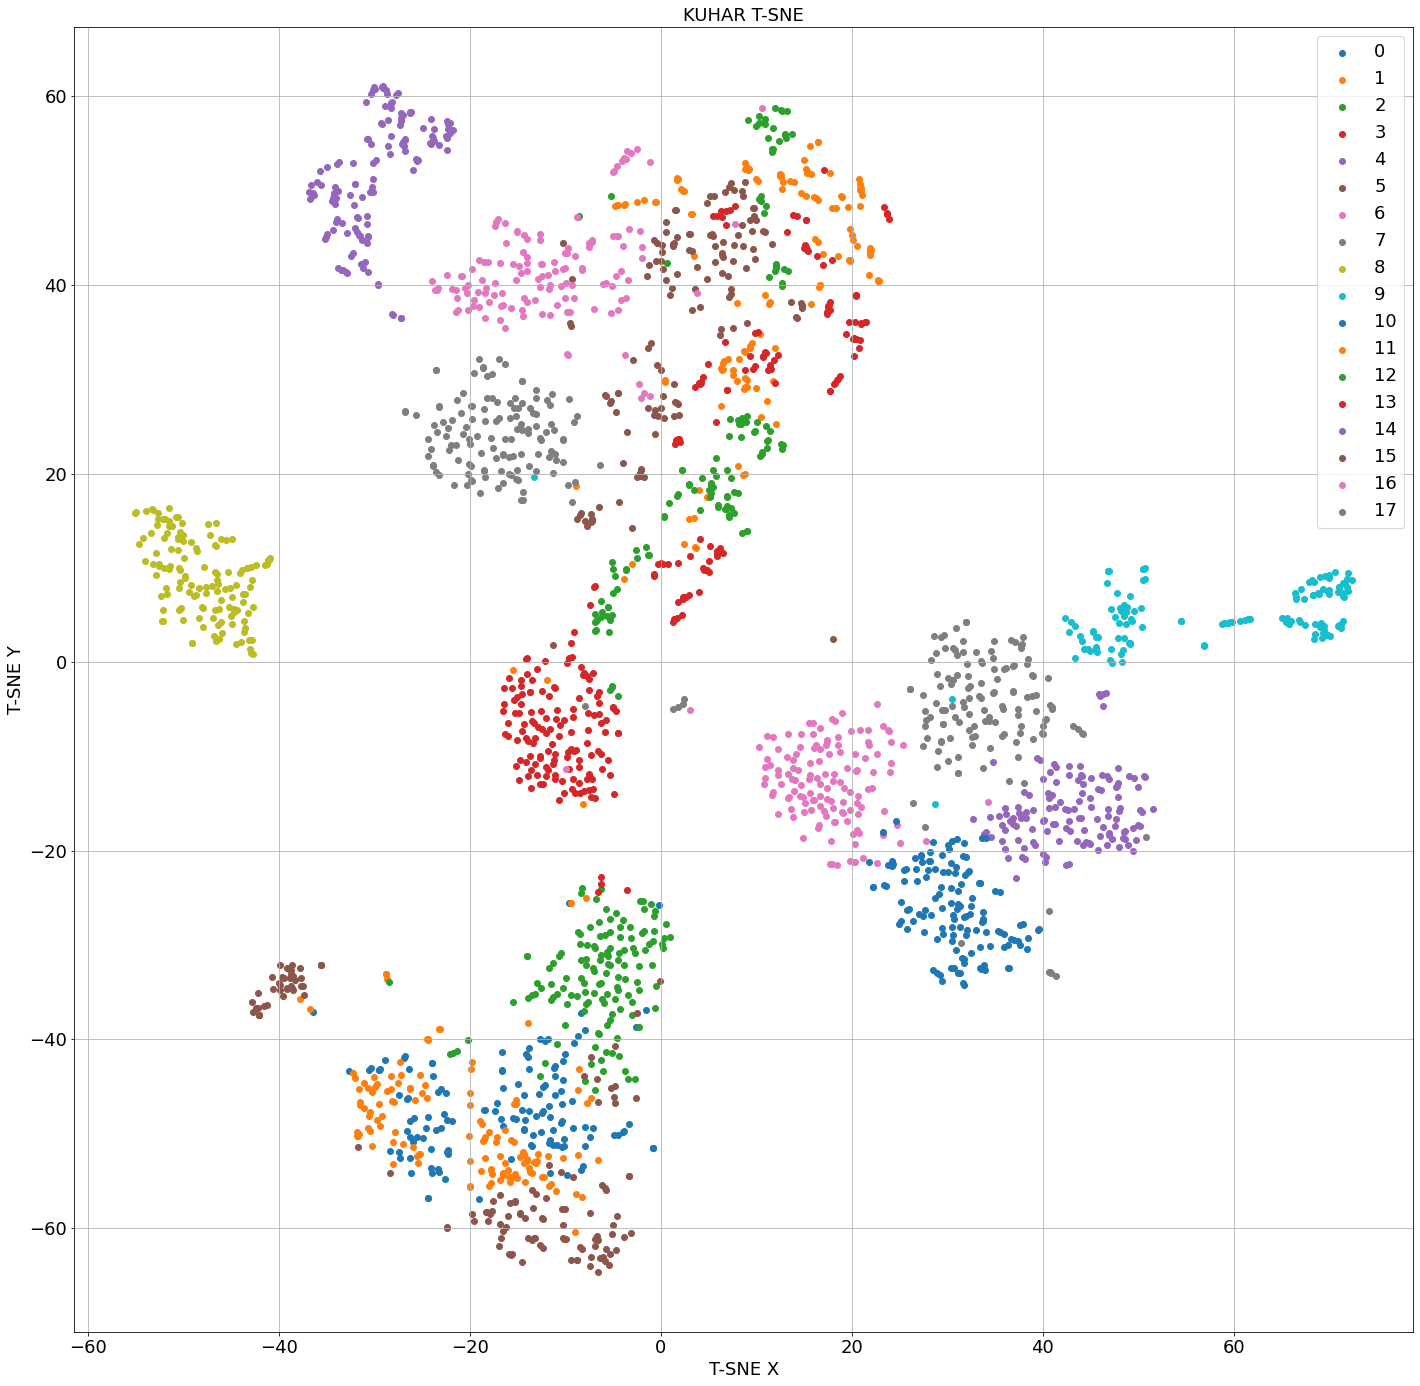

In [23]:
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(1,1,1)
ax.set_title("KUHAR T-SNE", fontsize=18)
ax.set_xlabel("T-SNE X", fontsize=18)
ax.set_ylabel("T-SNE Y", fontsize=18)
    
for label, points in df.groupby("label"):
    ax.scatter(points["X"], points["Y"], label=label)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(prop={'size': 18})
ax.grid()
plt.show()